In order to start this algorithm, I need to define the following Linear Regression formula for prediction
$$\hat{y} = mx + b$$
As the line that predicts the possible line of best fit. I need to define the error function to evaluate the model's when training it. \
The one commonly used for Linear Regression is Mean Squared Error
Mean Squared Error
$$MSE = \frac{1}{n} * \sum_{i=0}^{n} (y_{i} - \hat{y_{i}})^{2}$$
$$MSE = \frac{1}{n} * \sum_{i=0}^{n} (y_{i} - (mx_{i} + b))^{2}$$


For me to find the optimum change of value needed to find the line of best fit, I need to take the largest change in error and invert it's direction (it's the same as going for the minimum error). \
Therefore the derivative must be computed with respect to the values we're changing or adjusting which are $m$ and $b$. \
Change in $\beta_j$
$$\frac{\partial{MSE}}{\partial{\beta_j}} = \frac{-2}{n} * \sum_{i=0}^{n} (x_{j})(y_{i} - (mx_{i} + b))$$


To the better $\beta_j$ we do
$$ \beta_{n} := \beta_{i} - L * \frac{\partial{MSE}}{\partial{m}}$$
where L (usually 0.001) is the learning rate


In [120]:
X = X[:5]
y = y[:5]
print(X, y)

[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]] [ 1.55894336  0.37658375  0.19027914  3.70749834 -2.40508069]


In [232]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Number of features
n_features = 5

# Generate random features
X = np.random.randn(n_samples, n_features)

# True weights (coefficients)
true_weights = np.random.randn(n_features)
print(n_features)
print(true_weights)
# Generate target variable with added noise
noise = 0.5 * np.random.randn(n_samples)  # Add Gaussian noise
y = np.dot(X, true_weights) + noise

print("X shape:", X.shape)
print("y shape:", y.shape)

5
[-0.42375968 -0.45341411 -1.79564317 -0.33009019  0.73282908]
X shape: (1000, 5)
y shape: (1000,)


[-0.42375968 -0.45341411 -1.79564317 -0.33009019  0.73282908]
[-4.37536082e-01 -4.16939833e-01 -1.82178201e+00 -3.31971925e-01
  7.38957883e-01  2.73868127e-05]


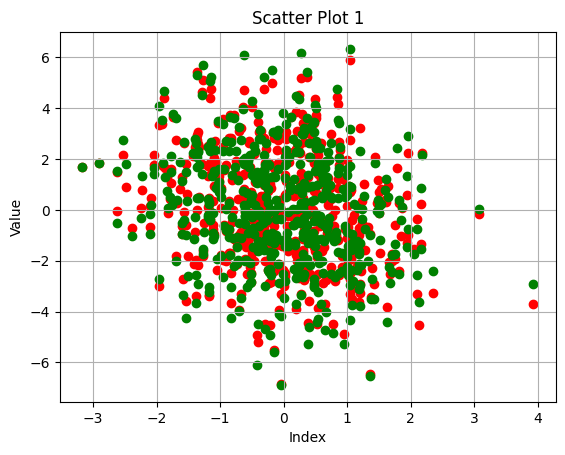

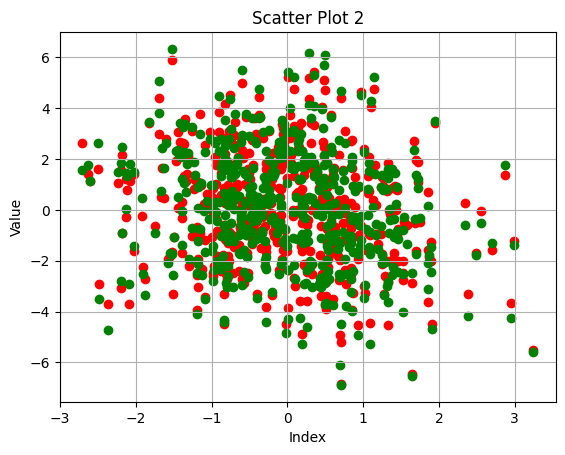

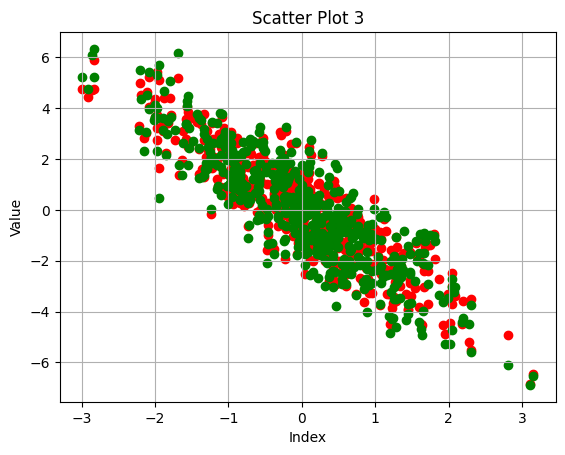

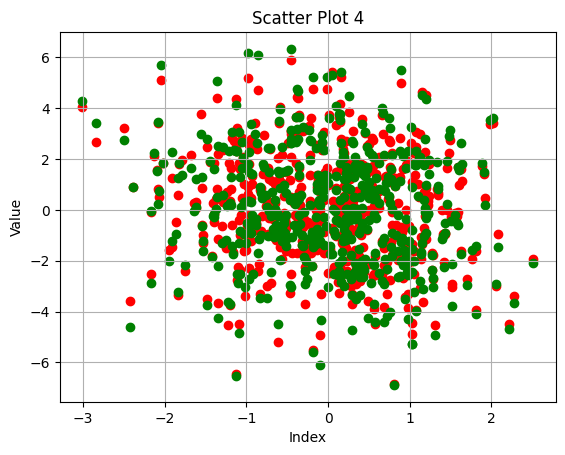

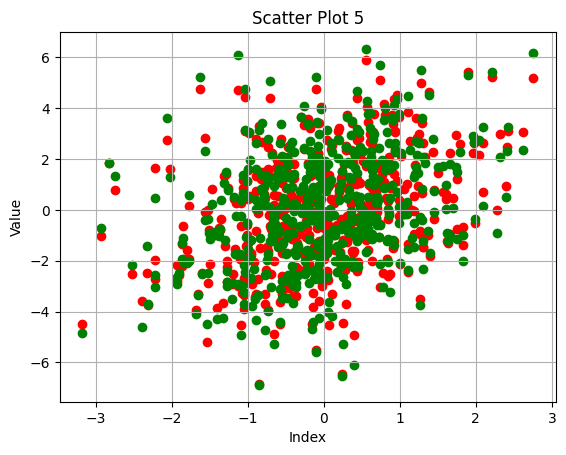

In [241]:
from numpy import ndarray
import numpy as np
import random


class Linear:
    def __init__(self, X):
        self.n = X.shape[1]
        self.m = len(X)
        self.weights = np.zeros(self.n + 1)

    def predict(self, X: ndarray):
        weights_without_bias = self.weights[:-1]
        return np.array(
            [np.dot(weights_without_bias, x_i) + self.weights[-1] for x_i in X]
        )

    def optimize(self, y, y_hat, X):
        if len(y) != len(y_hat) or len(y) != len(X):
            raise ValueError("Lengths of y, y_hat, and X must be the same")
        for i in range(len(self.weights) - 1):
            self.weights[i] -= L * (
                (-2 / (len(y)))
                * np.sum([X[k][i] * (y[k] - y_hat[k]) for k in range(self.m)])
            )
        self.weights[-1] = L * (
            (-2 / (len(y))) * np.sum([(y[k] - y_hat[k]) for k in range(self.m)])
        )


L = 0.001
epochs = 5000
X_train = X[:500]
y_train = y[:500]
X_test = X[500:]
y_test = y[500:]
model = Linear(X_train)
for i in range(epochs):
    y_hat = model.predict(X_train)
    model.optimize(y_train, y_hat, X_train)
model.n = X_test.shape[1]
model.m = len(X_test)
y_hat = model.predict(X_test)
print(true_weights)
print(model.weights)
for i in range(model.n):
    plt.figure()
    plt.scatter(X_test[:, i], y_hat, color="red")
    plt.scatter(X_test[:, i], y_test, color="green")
    plt.title(f"Scatter Plot {i+1}")  # Set a title for the plot
    plt.xlabel("Index")  # Set the x-axis label
    plt.ylabel("Value")  # Set the y-axis label
    plt.grid(True)  # Add a grid
    plt.show()